<a href="https://colab.research.google.com/github/Devika0910/ML-Task/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Heart_Disease_Prediction.csv')
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
data['pred']=data['Heart Disease'].map({'Presence':1,'Absence':0})
data.head(3)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,pred
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1


In [ ]:
data=data.fillna(data.mean())

<ipython-input-73-2fdd91382263>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=data.fillna(data.mean())


In [ ]:
drp=['pred','Heart Disease']

In [ ]:
data1=data.drop('Heart Disease',axis=1)

In [ ]:
X= data.drop(columns=drp)
y = data['pred']

In [ ]:
print(X.shape,y.shape)

(270, 13) (270,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

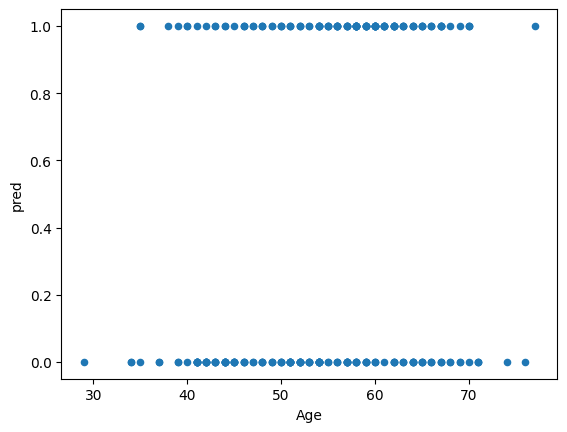

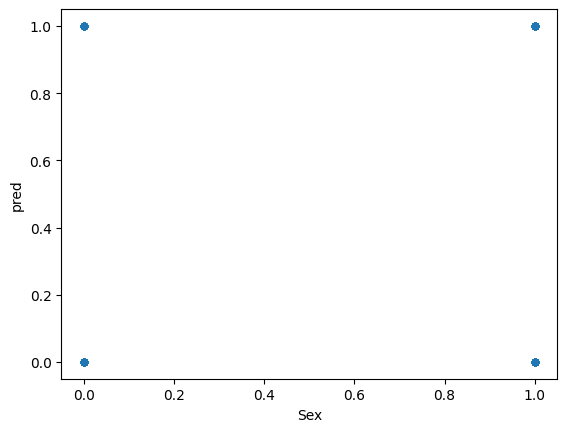

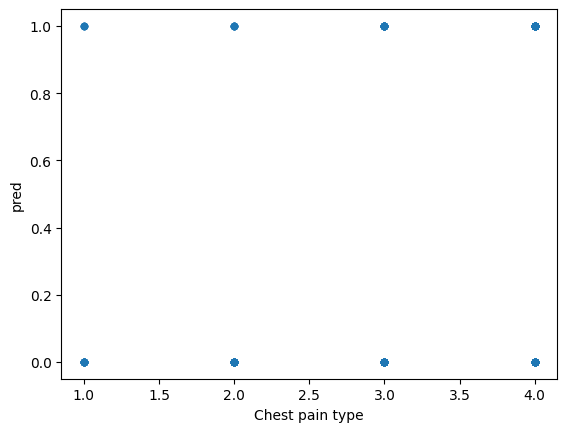

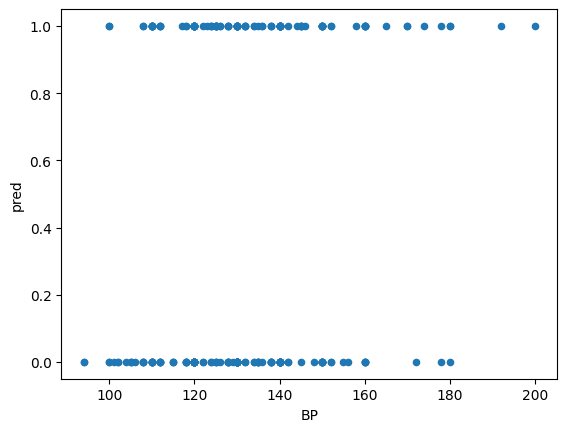

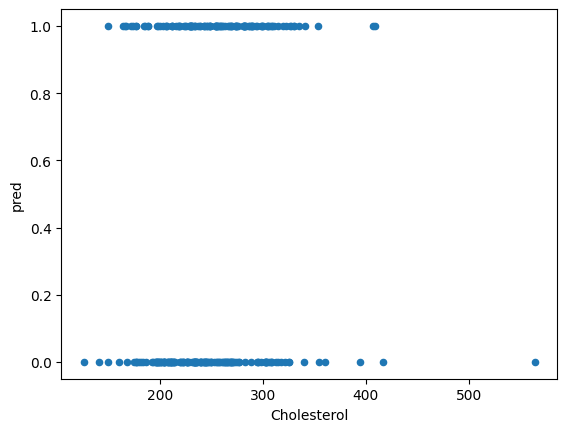

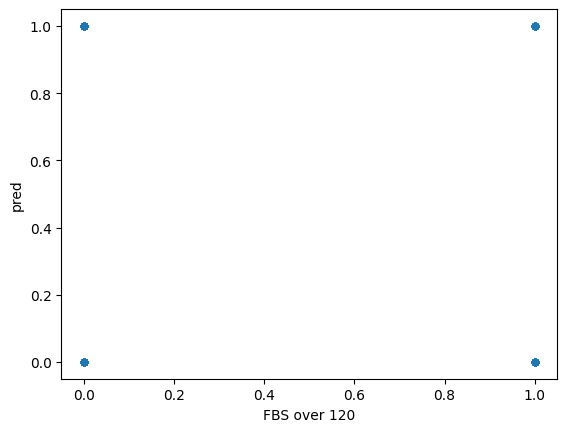

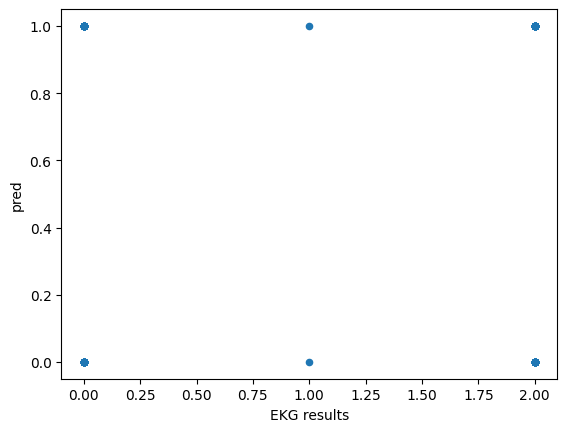

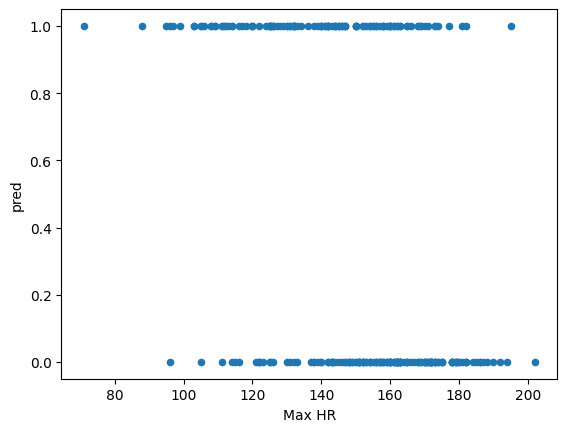

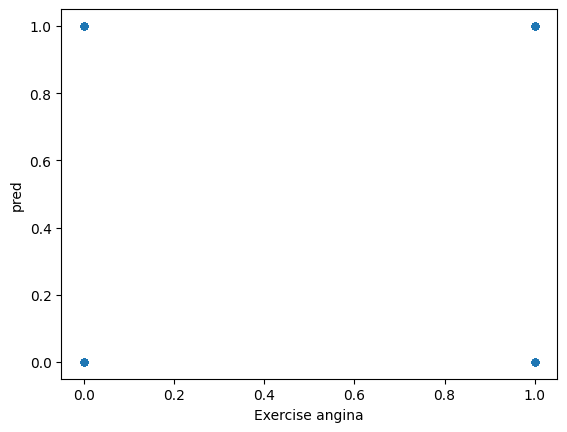

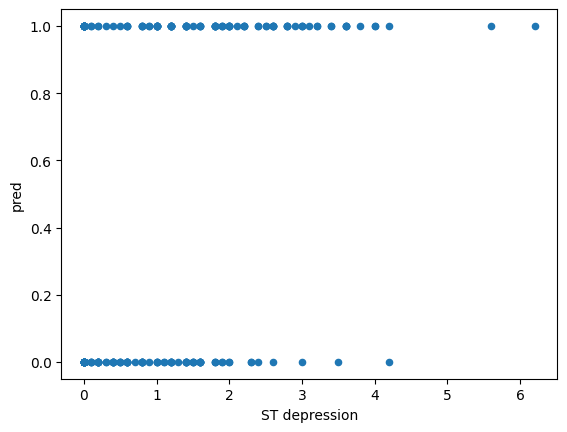

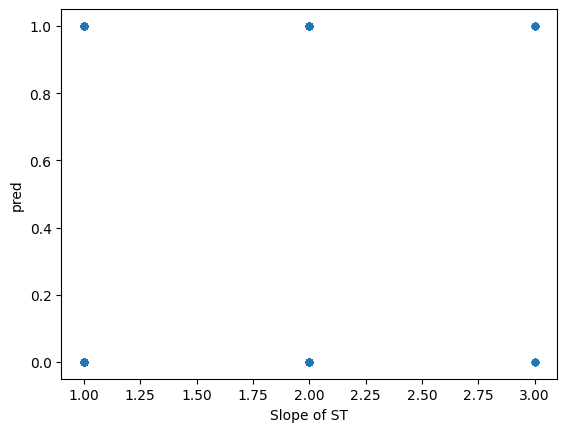

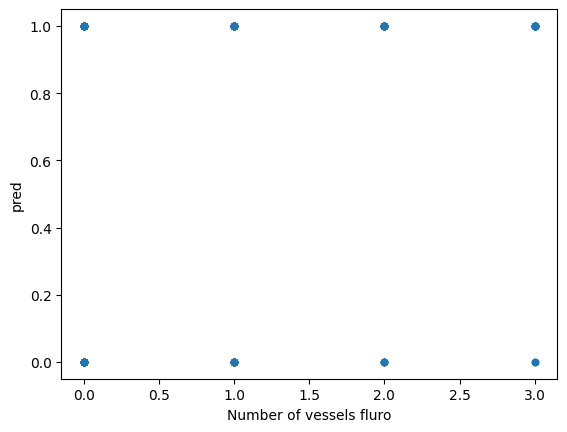

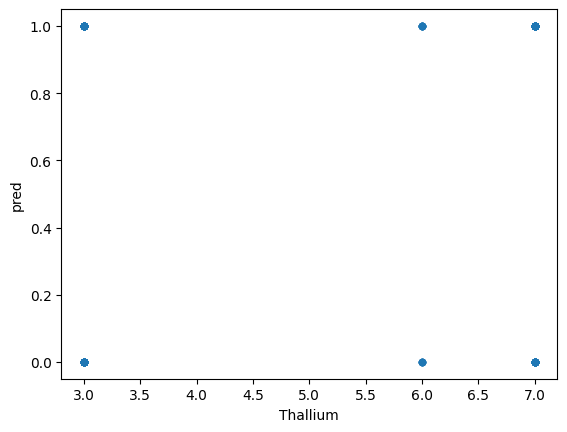

In [ ]:
fig=['Age','Sex','Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR','Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium']
for item in fig:
  data.plot.scatter(x=item,y='pred')

In [ ]:
# model=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),KNeighborsClassifier()]

In [ ]:
# for item in model:
#   item.fit(X_train,y_train)
#   y_pred=item.predict(X_test)
#   accuracy_score(y_test,y_pred)*100
# print(accuracy_score)




logistic regression

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred= model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
accuracy= accuracy_score(y_test,y_pred)*100
accuracy

90.74074074074075

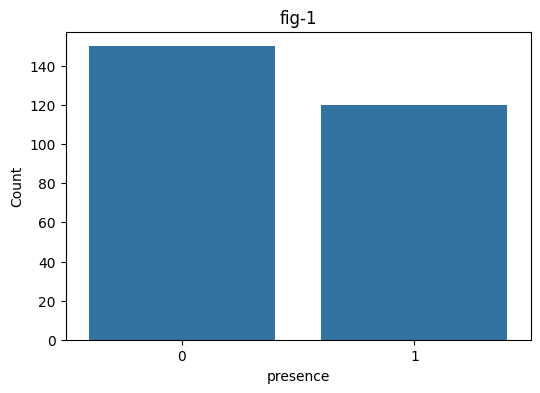

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='pred', data=data)
plt.title('fig-1')
plt.xlabel('presence')
plt.ylabel('Count')
plt.show()


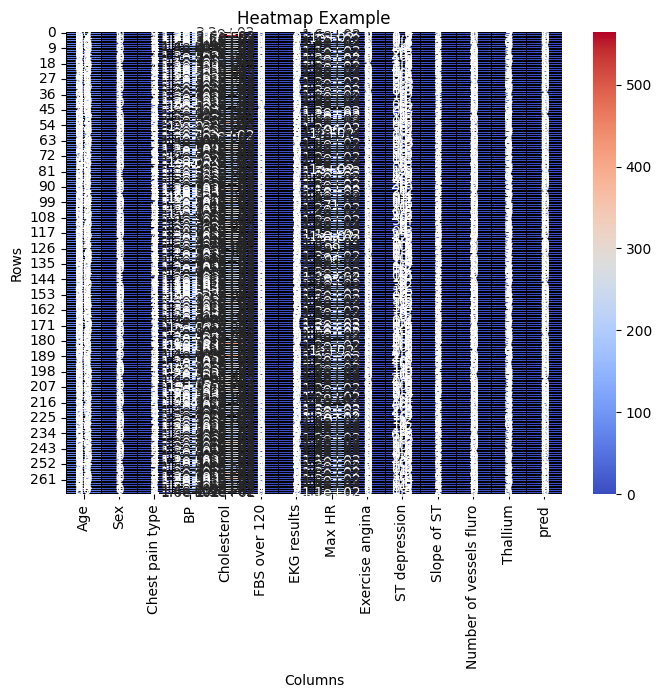

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data1, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Heatmap Example')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

Decisiontree

In [ ]:
model2=DecisionTreeClassifier(criterion='entropy',random_state=742)
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=742)

In [ ]:
y_pred2=model2.predict(X_test)
y_pred2

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [ ]:
accuracy_score(y_test,y_pred2)*100

75.92592592592592

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz


[Text(0.46710526315789475, 0.9444444444444444, 'x[2] <= 3.5\nentropy = 0.99\nsamples = 216\nvalue = [121, 95]'),
 Text(0.16447368421052633, 0.8333333333333334, 'x[0] <= 45.5\nentropy = 0.708\nsamples = 114\nvalue = [92, 22]'),
 Text(0.13815789473684212, 0.7222222222222222, 'entropy = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.19078947368421054, 0.7222222222222222, 'x[1] <= 0.5\nentropy = 0.816\nsamples = 87\nvalue = [65, 22]'),
 Text(0.05263157894736842, 0.6111111111111112, 'x[11] <= 0.5\nentropy = 0.337\nsamples = 32\nvalue = [30, 2]'),
 Text(0.02631578947368421, 0.5, 'entropy = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.07894736842105263, 0.5, 'x[7] <= 113.5\nentropy = 0.764\nsamples = 9\nvalue = [7, 2]'),
 Text(0.05263157894736842, 0.3888888888888889, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.10526315789473684, 0.3888888888888889, 'x[4] <= 318.5\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]'),
 Text(0.07894736842105263, 0.2777777777777778, 'entropy = 0.0\nsamples 

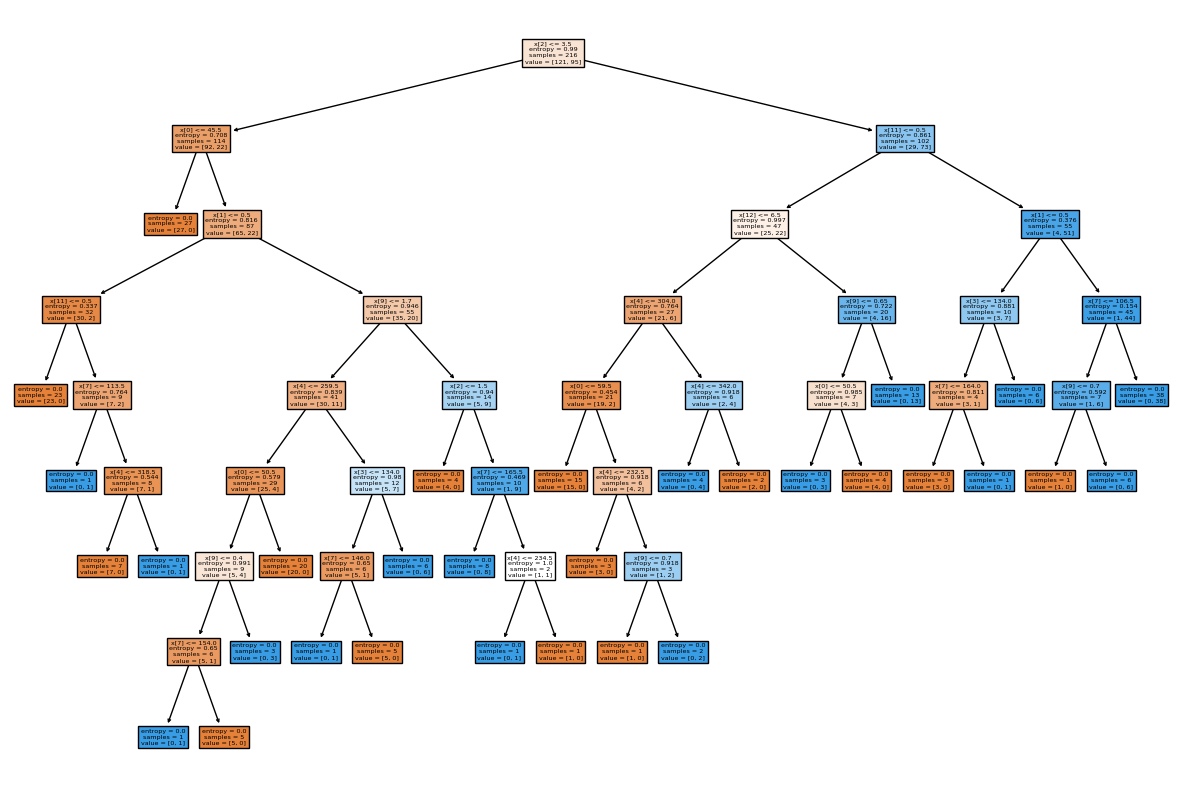

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model2,filled=True)

random forest

In [ ]:
model3=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=345)
model3.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=345)

In [ ]:
y_pred3=model3.predict(X_test)
y_pred3

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
accuracy=accuracy_score(y_test,y_pred3)*100
accuracy

88.88888888888889

KNN

In [ ]:
model4=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model4.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred4=model4.predict(X_test)
y_pred4

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [ ]:
accuracy=accuracy_score(y_test,y_pred4)*100
accuracy

62.96296296296296

In [ ]:
def plot_decision_boundaries(X, y, model4):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model4.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('KNN Decision Boundaries for Heart Disease Prediction')
plt.show()

SVM

In [ ]:
model5=SVC(kernel='linear',random_state=76)
model5.fit(X_train,y_train)

SVC(kernel='linear', random_state=76)

In [ ]:
y_pred5=model5.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_pred5,y_test)*100
accuracy

87.03703703703704

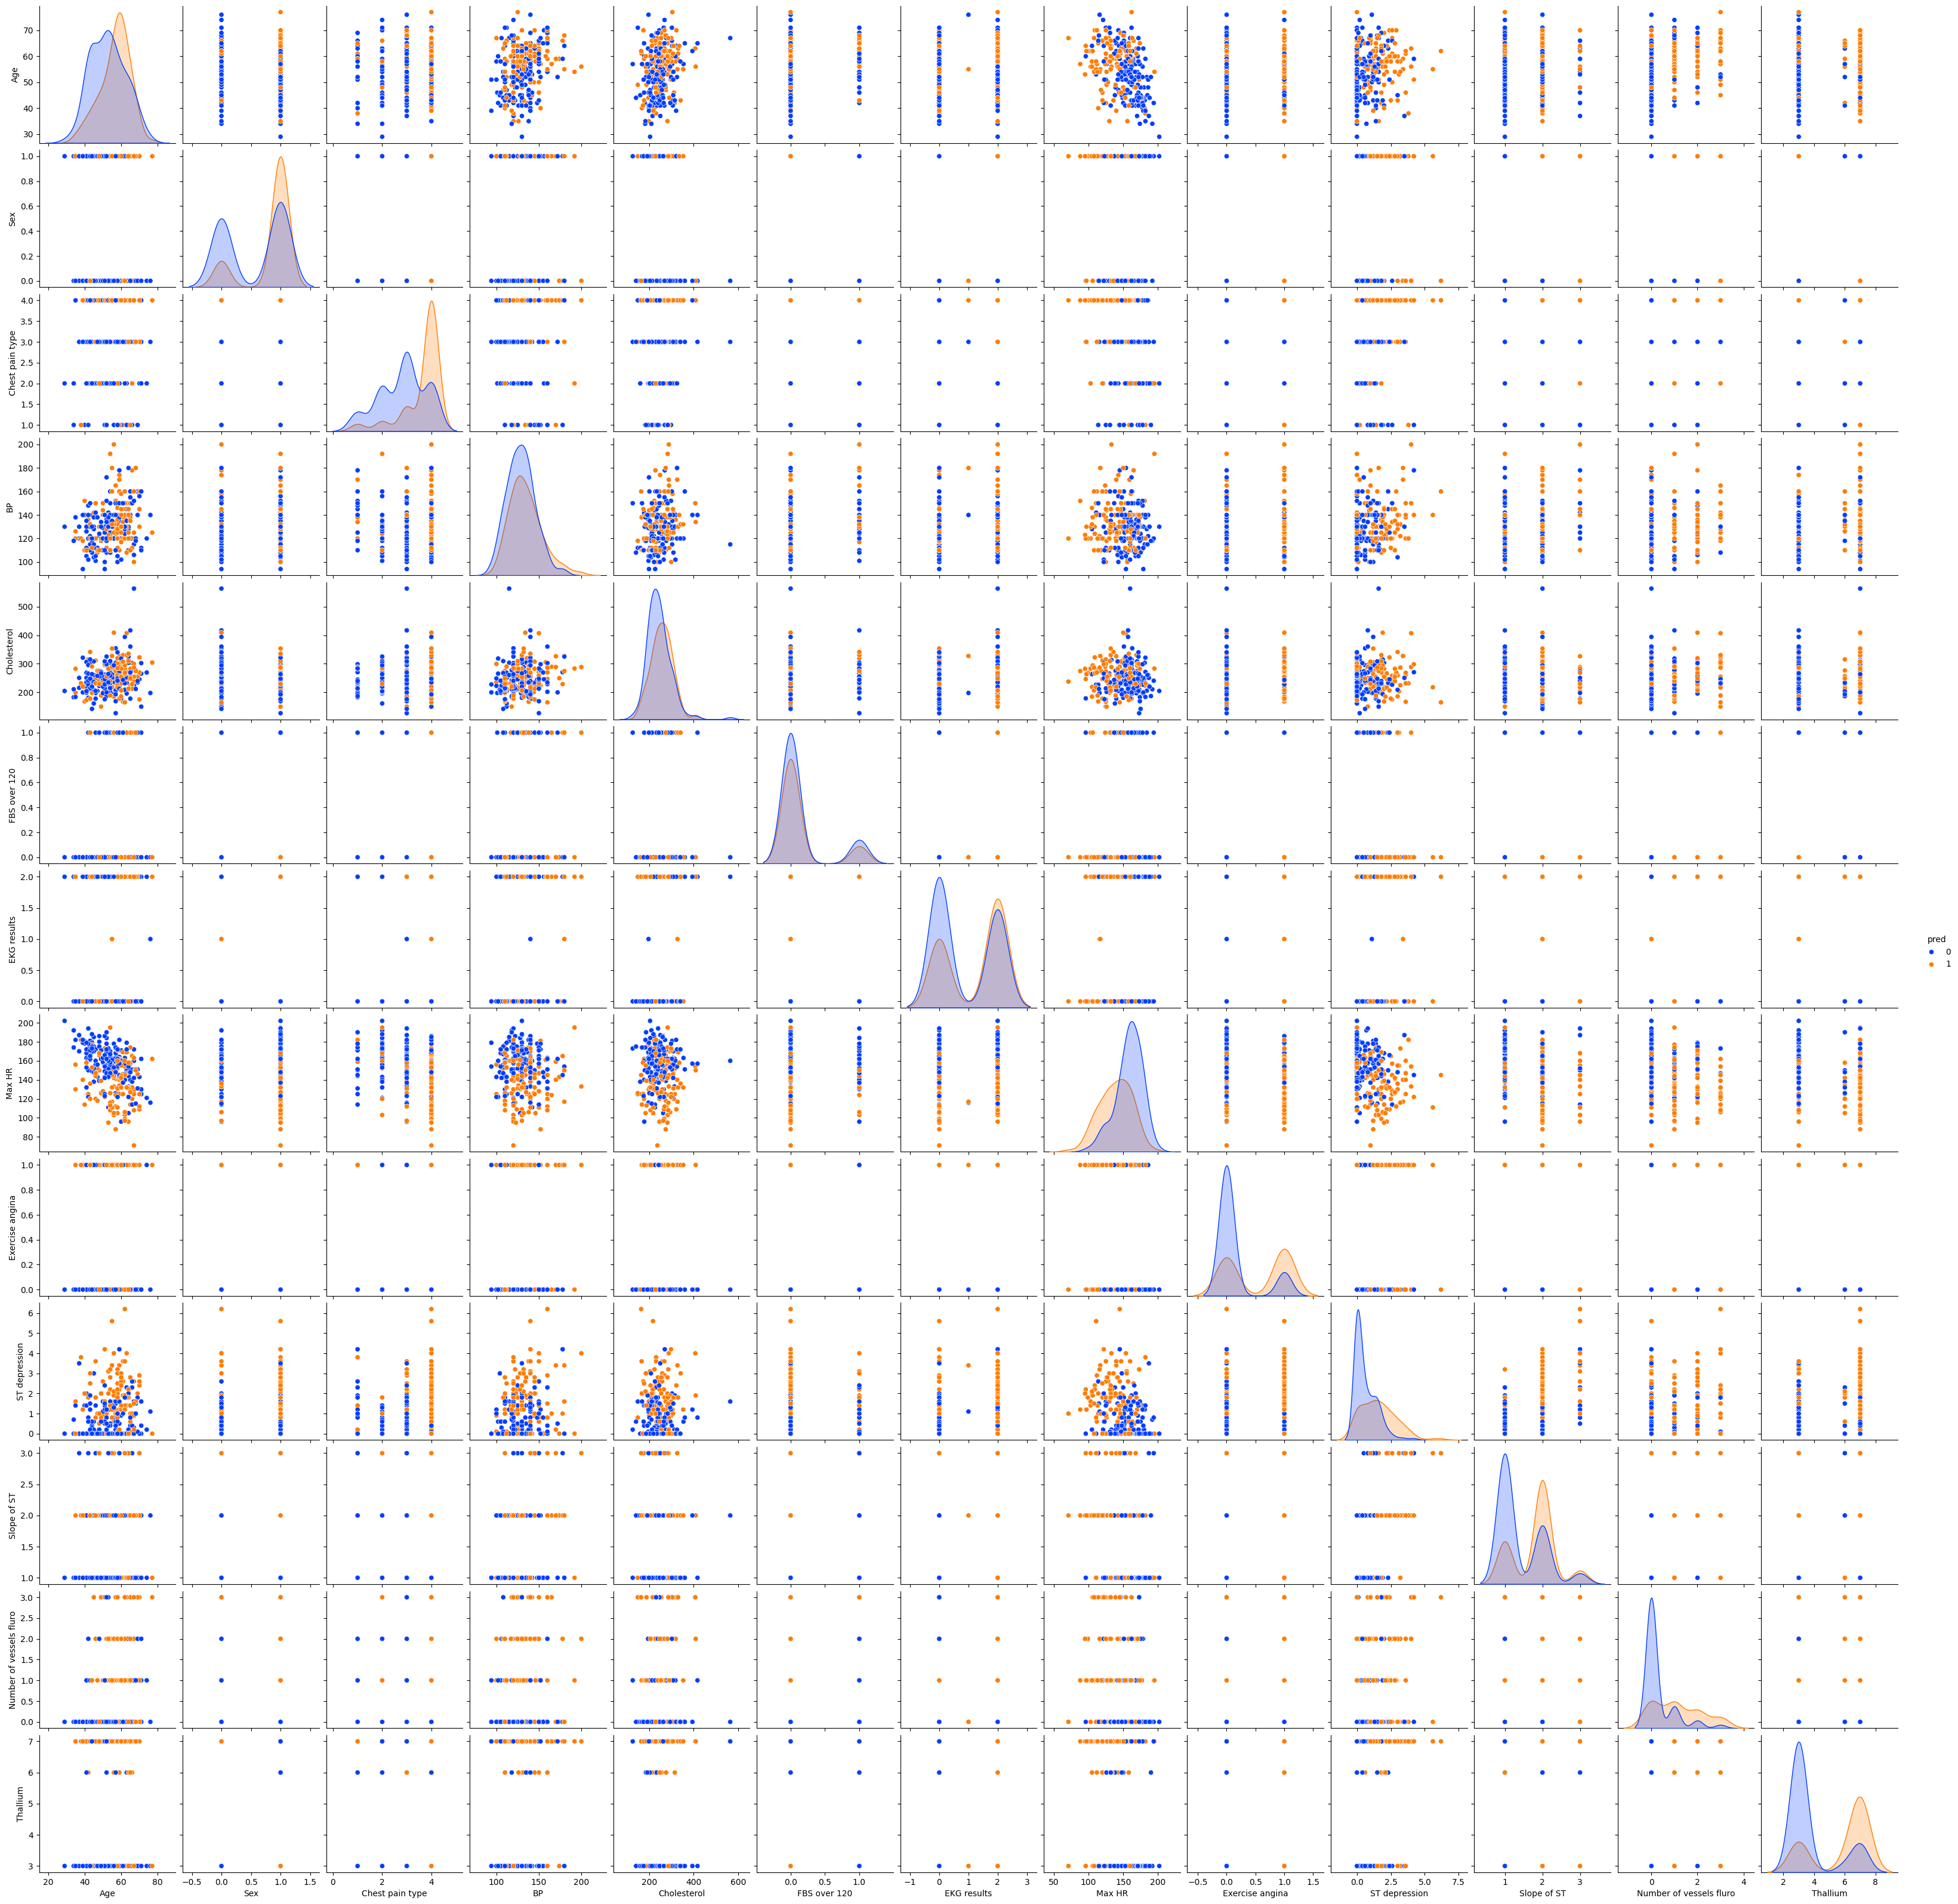

In [ ]:
sns.pairplot(data,hue="pred",palette='bright')

In [ ]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(X_train,y_train)


y_pred6 = model6.predict(X_test)
accuracy=accuracy_score(y_test,y_pred6)*100
accuracy

90.74074074074075

from the above logistics regression and naive bayes has the highest value of accuracy 90.74